Saving Copy of daily-website-visitors (1).csv to Copy of daily-website-visitors (1) (1).csv


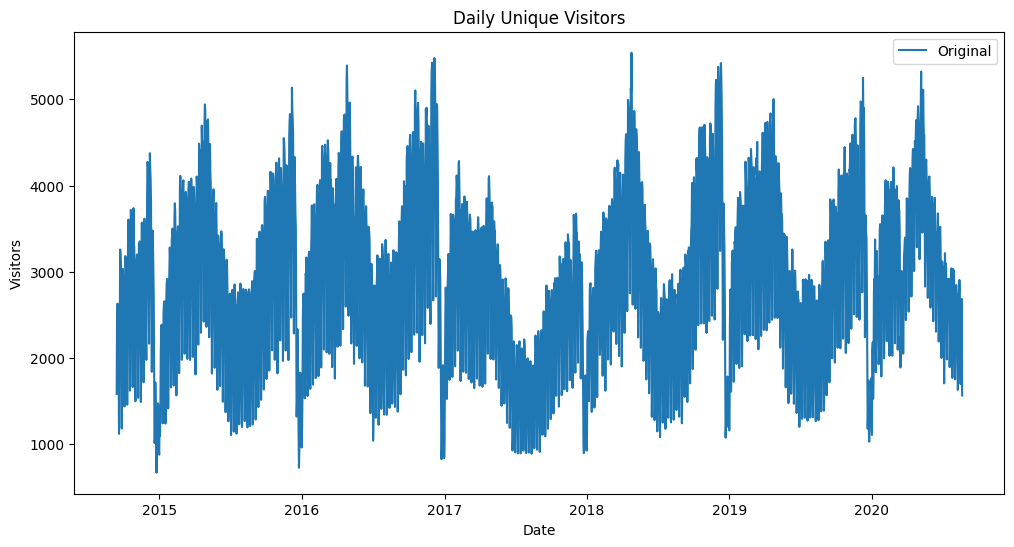

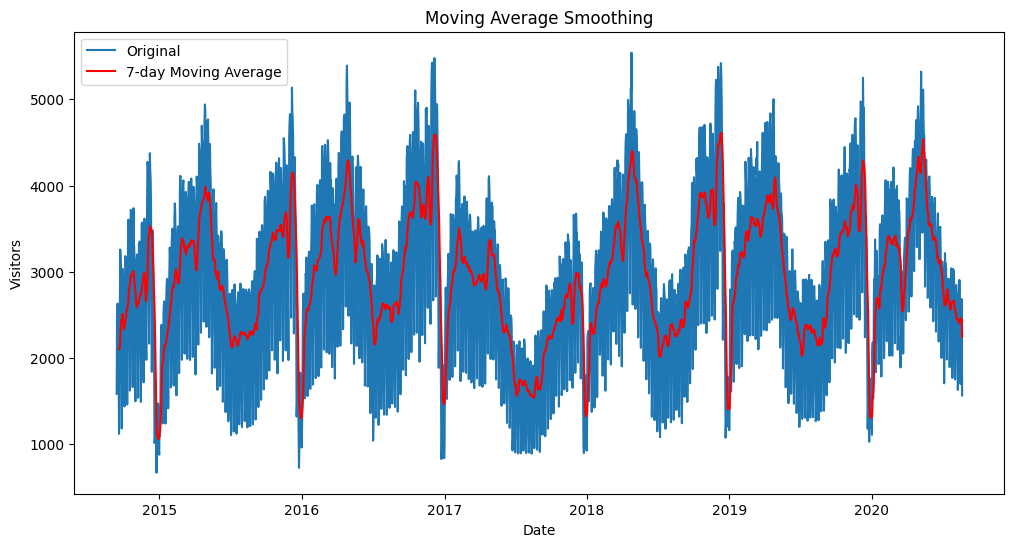

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


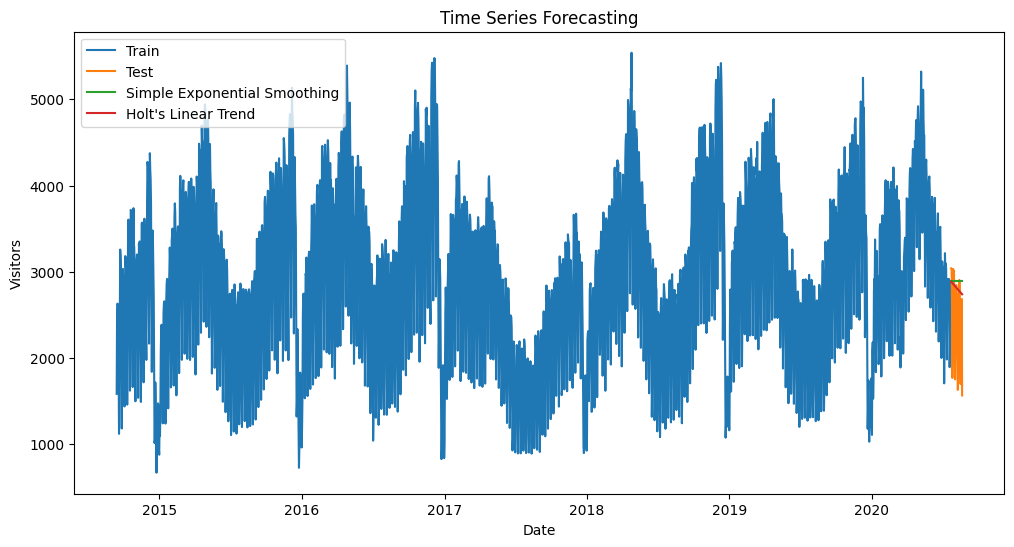

Simple Exponential Smoothing RMSE: 632.54
Holt's Linear Trend RMSE: 573.92


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data
from google.colab import files
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/time series/EXP6/Copy of daily-website-visitors.csv', thousands=',')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Sort by date (just in case)
df = df.sort_index()

# Select the target variable (using Unique.Visits as example)
ts = df['Unique.Visits']

# Plot original time series
plt.figure(figsize=(12,6))
plt.plot(ts, label='Original')
plt.title('Daily Unique Visitors')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()
plt.show()

## Moving Average Smoothing
window_size = 7  # weekly moving average
moving_avg = ts.rolling(window=window_size).mean()

# Plot original vs smoothed
plt.figure(figsize=(12,6))
plt.plot(ts, label='Original')
plt.plot(moving_avg, label=f'{window_size}-day Moving Average', color='red')
plt.title('Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()
plt.show()

## Time Series Forecasting with Exponential Smoothing

# Split data into train and test (last 30 days for testing)
split_date = ts.index[-30]
train = ts[ts.index <= split_date]
test = ts[ts.index > split_date]

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(train).fit()
fcast1 = fit1.forecast(len(test))

# Holt's Linear Trend Model
fit2 = Holt(train).fit()
fcast2 = fit2.forecast(len(test))

# Plot forecasts
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(fcast1, label='Simple Exponential Smoothing')
plt.plot(fcast2, label='Holt\'s Linear Trend')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()
plt.show()

# Calculate RMSE
rmse_ses = sqrt(mean_squared_error(test, fcast1))
rmse_holt = sqrt(mean_squared_error(test, fcast2))

print(f"Simple Exponential Smoothing RMSE: {rmse_ses:.2f}")
print(f"Holt's Linear Trend RMSE: {rmse_holt:.2f}")

